In [ ]:
import numpy as np
import torch
from torch import nn
from torchvision import transforms,datasets
from torch.utils.data import DataLoader, random_split
trainset = datasets.CIFAR10 ( root ='./ data ',
                               train =True ,
                               download =True ,
                               transform = transforms.ToTensor())
testset = datasets.CIFAR10 ( root ='./ data ',
                               train =False ,
                               download =True ,
                               transform = transforms.ToTensor())

100%|██████████| 170498071/170498071 [00:03<00:00, 49522194.36it/s]


Extracting ./ data /cifar-10-python.tar.gz to ./ data 
Files already downloaded and verified


In [ ]:
print(f"number of training examples: {len(trainset)}")
print(f"number of test examples: {len(testset)}")
print(f"shape of trainset:{trainset.data.shape}")
print(f"shape of testset:{testset.data.shape}")
print(trainset.targets)
print(trainset.classes)

number of training examples: 50000
number of test examples: 10000
shape of trainset:(50000, 32, 32, 3)
shape of testset:(10000, 32, 32, 3)
[6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0, 3, 7, 3, 3, 5, 2, 2, 7, 1, 1, 1, 2, 2, 0, 9, 5, 7, 9, 2, 2, 5, 2, 4, 3, 1, 1, 8, 2, 1, 1, 4, 9, 7, 8, 5, 9, 6, 7, 3, 1, 9, 0, 3, 1, 3, 5, 4, 5, 7, 7, 4, 7, 9, 4, 2, 3, 8, 0, 1, 6, 1, 1, 4, 1, 8, 3, 9, 6, 6, 1, 8, 5, 2, 9, 9, 8, 1, 7, 7, 0, 0, 6, 9, 1, 2, 2, 9, 2, 6, 6, 1, 9, 5, 0, 4, 7, 6, 7, 1, 8, 1, 1, 2, 8, 1, 3, 3, 6, 2, 4, 9, 9, 5, 4, 3, 6, 7, 4, 6, 8, 5, 5, 4, 3, 1, 8, 4, 7, 6, 0, 9, 5, 1, 3, 8, 2, 7, 5, 3, 4, 1, 5, 7, 0, 4, 7, 5, 5, 1, 0, 9, 6, 9, 0, 8, 7, 8, 8, 2, 5, 2, 3, 5, 0, 6, 1, 9, 3, 6, 9, 1, 3, 9, 6, 6, 7, 1, 0, 9, 5, 8, 5, 2, 9, 0, 8, 8, 0, 6, 9, 1, 1, 6, 3, 7, 6, 6, 0, 6, 6, 1, 7, 1, 5, 8, 3, 6, 6, 8, 6, 8, 4, 6, 6, 1, 3, 8, 3, 4, 1, 7, 1, 3, 8, 5, 1, 1, 4, 0, 9, 3, 7, 4, 9, 9, 2, 4, 9, 9, 1, 0, 5, 9, 0, 8, 2, 1, 2, 0, 5, 6,

# b) Visualize at least one image for each class. You may need to look into how dataset is implemented in PyTorch.

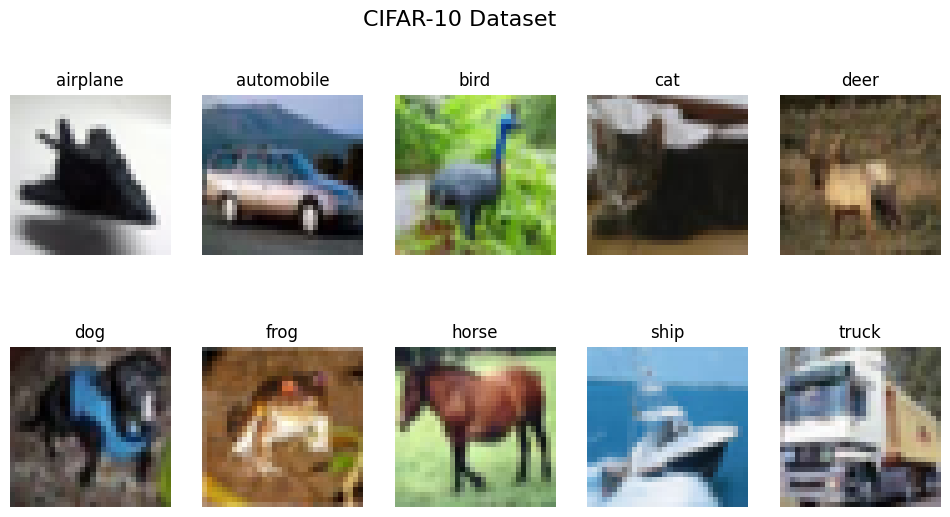

In [ ]:
import matplotlib.pyplot as plt

class_dict = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck'
}

fig, axes = plt.subplots(2, 5, figsize=(12, 6))
fig.suptitle('CIFAR-10 Dataset', fontsize=16)
for i in range(10):
    image, label = trainset.data[trainset.targets.index(i)], class_dict[i]
    row, col = i // 5, i % 5
    axes[row, col].imshow(image)
    axes[row, col].set_title(label)
    axes[row, col].axis('off')

plt.show()


# c) Split the trainset into training set and validation set with 90% : 10% ratio. Implement dataloaders for CIFAR10.

In [ ]:
class CustomCIFAR10(datasets.CIFAR10):
    def __init__(self, root, train=True, transform=None, target_transform=None, download=False):
        super(CustomCIFAR10, self).__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)

        # Filter the data with labels 0 or 2
        data, targets = [], []
        for idx in range(len(self.data)):
            if self.targets[idx] == 0 or self.targets[idx] == 2:
                data.append(self.data[idx])
                targets.append(1 if self.targets[idx] == 0 else -1)  # Assign 1 to class 0 and -1 to class 2

        self.data = data
        self.targets = targets

# Load the custom dataset with filtered labels
trainset2 = CustomCIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
testset2 = CustomCIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())

val_ratio = 0.1
num_train = len(trainset2)
num_val = int(num_train*val_ratio)
num_train -= num_val

torch.manual_seed(42)
train_set,val_set = random_split(trainset2, [num_train, num_val])
print(f"length of trainset: {len(train_set)}, length of valset: {len(val_set)}, length of testset: {len(testset2)}")

100%|██████████| 170498071/170498071 [00:15<00:00, 11106253.78it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
length of trainset: 9000, length of valset: 1000, length of testset: 2000


In [ ]:
train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=64, shuffle=True)
test_dataloader = DataLoader(testset, batch_size=64, shuffle=True)

# d) Choose any two classes. Then, make a SVM classifier (implement a loss function yourself. Do not use PyTorch implementations of loss functions.) and its training/validation/evaluation code to perform binary classification between those two classes.

In [ ]:
class SVM(nn.Module):
    def __init__(self, input_dim=3*32*32,lambda_param=0.01):#즉, input_dim = 1024
        super().__init__()
        self.lambda_param = lambda_param
        self.flatten = nn.Flatten()
        self.classifier = nn.Linear(input_dim,1,bias=True)

    def hinge_loss(self, pred,y):
        loss = 1-y*pred #y가 실제 label, pred는 모델의 예측값
        return torch.mean(torch.max(torch.zeros_like(loss), loss))

    def loss_fn(self, pred, y): # x:input data, y:labels->all tensors: (x,y) tuples in a single batch!!
        regularization_loss = self.lambda_param * torch.norm(self.classifier.weight)
        return self.hinge_loss(pred,y)+regularization_loss

    def forward(self, x): #batch 하나에 대하여->64*3*32*32
        x = self.flatten(x) #64*3072
        x = self.classifier(x) #(64,)
        x = x.squeeze()
        return x


In [ ]:
def train_loop(dataloader, model, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)

        # Compute prediction and loss
        pred = model(X) #PyTorch: model(X) calls forward method of the model.
        loss = model.loss_fn(pred, y.float())

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 50 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")
def val_loop(dataloader, model,arr):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    print(f"size: {size}, num_batches: {num_batches}")
    val_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            val_loss += model.loss_fn(pred, y.float()).item()
            correct += ((pred > 0) == (y == 1)).sum().item()


    val_loss /= num_batches
    print(f"Validation: \ncorrect:{correct} out of {size} validation examples\n")
    correct = float(correct) / size
    accuracy = 100*correct
    arr.append(accuracy)
    print(f"Accuracy: {(accuracy):>0.1f}%, Avg loss: {val_loss:>8f} \n")

def test_loop(dataloader, model,arr):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    print(f"size: {size}, num_batches: {num_batches}")
    val_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            val_loss += model.hinge_loss(pred, y.float()).item()
            correct += ((pred > 0) == (y == 1)).sum().item()


    val_loss /= num_batches
    print(f"Test: \ncorrect:{correct} out of {size} test examples\n")
    correct = float(correct) / size
    accuracy = 100*correct
    arr.append(accuracy)
    print(f"Accuracy: {(accuracy):>0.1f}%, Avg loss: {val_loss:>8f} \n")

# e) Train for 10 epochs with batch size 64.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

torch.manual_seed(42)
if device == "cuda":
    torch.cuda.manual_seed_all(42)

model = SVM().to(device)
print(model)

learning_rate = 1e-3 #0.003
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
e = []
val_acc = []
#val_loop(val_dataloader,model,val_acc)

for t in range(epochs):
    e.append(t+1)
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, optimizer)
    val_loop(val_dataloader,model,val_acc)

print("Done!")
print(val_acc)

Using cuda device
SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 1.036139  [   64/ 9000]
loss: 0.622659  [ 3264/ 9000]
loss: 0.727170  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:748 out of 1000 validation examples

Accuracy: 74.8%, Avg loss: 0.692475 

Epoch 2
-------------------------------
loss: 0.653303  [   64/ 9000]
loss: 0.699905  [ 3264/ 9000]
loss: 0.767294  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:770 out of 1000 validation examples

Accuracy: 77.0%, Avg loss: 0.632446 

Epoch 3
-------------------------------
loss: 0.636621  [   64/ 9000]
loss: 0.541932  [ 3264/ 9000]
loss: 0.702831  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:755 out of 1000 validation examples

Accuracy: 75.5%, Avg loss: 0.637857 

Epoch 4
-------------------------------
loss: 0.549904  [   64/ 9000]
loss: 0.551075  [ 3264/ 9000]

# f) Perform data normalization. You may need to look into how to use datasets in PyTorch.

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]
)

# Load the custom dataset with filtered labels
trainset2 = CustomCIFAR10(root='./data', train=True, download=True, transform=transform)
testset2 = CustomCIFAR10(root='./data', train=False, download=True, transform=transform)

torch.manual_seed(42)
train_set2,val_set2 = random_split(trainset2, [num_train, num_val])
print(f"length of trainset: {len(train_set2)}, length of valset: {len(val_set2)}, length of testset: {len(testset2)}")

train_dataloader2 = DataLoader(train_set2, batch_size=64, shuffle=True)
val_dataloader2 = DataLoader(val_set2, batch_size=64, shuffle=True)
test_dataloader2 = DataLoader(testset2, batch_size=64, shuffle=True)

if (train_set.indices == train_set2.indices):
  print("trainset and trainset2 same data but different transform")
else:
  print("trainset and trainset2 different data")

Files already downloaded and verified
Files already downloaded and verified
length of trainset: 9000, length of valset: 1000, length of testset: 2000
trainset and trainset2 same data but different transform


# g) Again, train for 10 epochs with batch size 64 after data normalization. Write down your observations.

SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 1.032695  [   64/ 9000]
loss: 0.509564  [ 3264/ 9000]
loss: 0.548345  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:783 out of 1000 validation examples

Accuracy: 78.3%, Avg loss: 0.559592 

Epoch 2
-------------------------------
loss: 0.542827  [   64/ 9000]
loss: 0.606571  [ 3264/ 9000]
loss: 0.640904  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:788 out of 1000 validation examples

Accuracy: 78.8%, Avg loss: 0.545467 

Epoch 3
-------------------------------
loss: 0.479162  [   64/ 9000]
loss: 0.481670  [ 3264/ 9000]
loss: 0.581285  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:789 out of 1000 validation examples

Accuracy: 78.9%, Avg loss: 0.534175 

Epoch 4
-------------------------------
loss: 0.533522  [   64/ 9000]
loss: 0.448270  [ 3264/ 9000]
loss: 0.414872  [

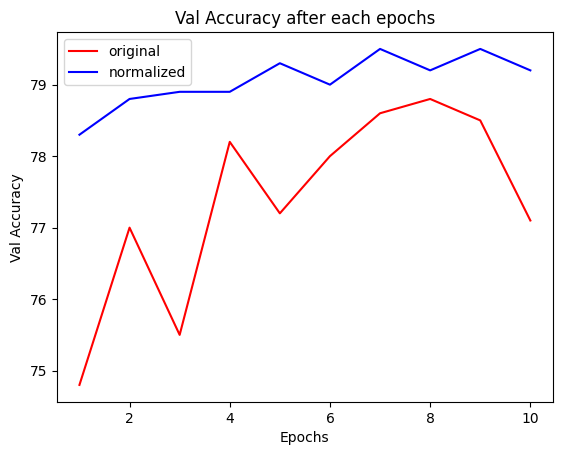

In [ ]:
torch.manual_seed(42)
if device == "cuda":
    torch.cuda.manual_seed_all(42)
model = SVM().to(device)

print(model)

learning_rate = 1e-3 #0.001
epochs = 10
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
e2 = []
val_acc2 = []
#val_loop(val_dataloader2,model,val_acc2)

for t in range(epochs):
    e2.append(t+1)
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader2, model, optimizer)
    val_loop(val_dataloader2,model,val_acc2)
print("Done!")

print("--- Comparision between the original and normalized ver --- ")

plt.plot(e,val_acc,label='original',color = 'red')
plt.plot(e2, val_acc2, label='normalized', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.title('Val Accuracy after each epochs')

plt.legend()
plt.show()



# h) What are the hyperparameters you can tune?

# i) Try to obtain find optimal hyperparameters.

In [ ]:
#lambda_param,learning rate, epoch, batch size
def lr_tuning(train_dataloader,val_dataloader,learning_rate,epochs):
  fig, ax = plt.subplots()
  e = [i for i in range(1,epochs+1)]
  final_val = []
  while(learning_rate<=0.1):
    print(f"**********Learning Rate: {learning_rate}************\n")
    torch.manual_seed(42)
    if device == "cuda":
      torch.cuda.manual_seed_all(42)
    model = SVM().to(device)
    print(model)

    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
    val_acc = []

    for t in range(epochs):
      print(f"Epoch {t+1}\n-------------------------------")
      train_loop(train_dataloader, model, optimizer)
      val_loop(val_dataloader,model,val_acc)
    print("Done!")

    #plotting
    ax.plot(e,val_acc,label = learning_rate)

    #recording final validation accuracy for each learning rate
    final_val.append(val_acc[epochs-1])

    #Increasing learning rate by 10 times
    learning_rate *= 10
  ax.set_xlabel('Epochs')
  ax.set_ylabel('Val Accuracy')
  ax.set_title('Val Accuracy for each Learning Rate')
  ax.legend()
  plt.show()
  return(final_val)

**********Learning Rate: 0.0001************

SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 1.032695  [   64/ 9000]
loss: 0.782825  [ 3264/ 9000]
loss: 0.718456  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:741 out of 1000 validation examples

Accuracy: 74.1%, Avg loss: 0.671851 

Epoch 2
-------------------------------
loss: 0.676840  [   64/ 9000]
loss: 0.721478  [ 3264/ 9000]
loss: 0.755890  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:761 out of 1000 validation examples

Accuracy: 76.1%, Avg loss: 0.617326 

Epoch 3
-------------------------------
loss: 0.592439  [   64/ 9000]
loss: 0.589498  [ 3264/ 9000]
loss: 0.626684  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:767 out of 1000 validation examples

Accuracy: 76.7%, Avg loss: 0.588504 

Epoch 4
-------------------------------
loss: 0.624014  [   64/ 9000]
lo

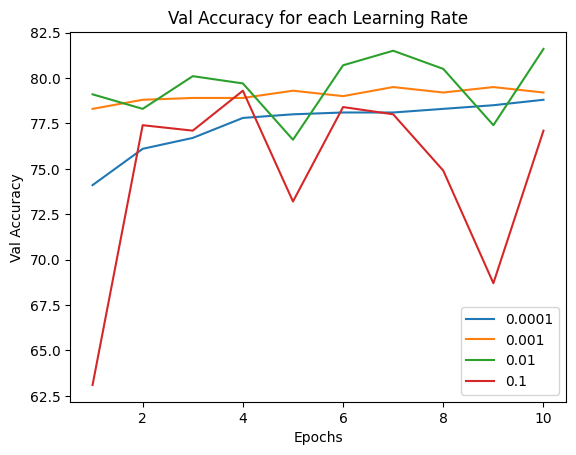

[78.8, 79.2, 81.6, 77.10000000000001]


In [ ]:
#1. learning rate
final_val = lr_tuning(train_dataloader2,val_dataloader2,1e-4,10)
print(final_val)

In [ ]:
#2 epoch
#torch.manual_seed(42)
#if device == "cuda":
#    torch.cuda.manual_seed_all(42)
model = SVM().to(device)

print(model)

learning_rate = 1e-3
epochs = 40
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
e = [i for i in range(1,epochs+1)]
val_acc = []

for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader2, model, optimizer)
    val_loop(val_dataloader2,model,val_acc)
print("Done!")

print("--- Comparision between the original and normalized ver --- ")

plt.plot(e,val_acc,color = 'red')
plt.xlabel('Epochs')
plt.ylabel('Val Accuracy')
plt.title('Val Accuracy after each epochs')
plt.show()

SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 0.978270  [   64/ 9000]
loss: 0.433298  [ 3264/ 9000]
loss: 0.623366  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:788 out of 1000 validation examples

Accuracy: 78.8%, Avg loss: 0.530366 

Epoch 2
-------------------------------
loss: 0.523308  [   64/ 9000]
loss: 0.758773  [ 3264/ 9000]
loss: 0.495259  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:785 out of 1000 validation examples

Accuracy: 78.5%, Avg loss: 0.519960 

Epoch 3
-------------------------------
loss: 0.433790  [   64/ 9000]
loss: 0.619582  [ 3264/ 9000]
loss: 0.581634  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:786 out of 1000 validation examples

Accuracy: 78.6%, Avg loss: 0.505262 

Epoch 4
-------------------------------
loss: 0.606765  [   64/ 9000]
loss: 0.468691  [ 3264/ 9000]
loss: 0.601206  [

KeyboardInterrupt: ignored

batch size: 64
SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 1.032695  [   64/ 9000]
loss: 0.509564  [ 3264/ 9000]
loss: 0.548345  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:783 out of 1000 validation examples

Accuracy: 78.3%, Avg loss: 0.553710 

Epoch 2
-------------------------------
loss: 0.542827  [   64/ 9000]
loss: 0.606571  [ 3264/ 9000]
loss: 0.640904  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:788 out of 1000 validation examples

Accuracy: 78.8%, Avg loss: 0.539528 

Epoch 3
-------------------------------
loss: 0.479162  [   64/ 9000]
loss: 0.481670  [ 3264/ 9000]
loss: 0.581285  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:789 out of 1000 validation examples

Accuracy: 78.9%, Avg loss: 0.528188 

Epoch 4
-------------------------------
loss: 0.533522  [   64/ 9000]
loss: 0.448270  [ 3264/ 9000]
lo

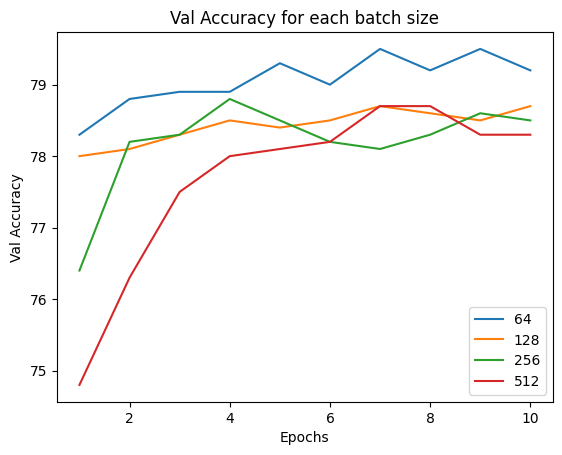

In [ ]:
#3.batch_size
fig, ax = plt.subplots()

learning_rate = 1e-3 #0.003
epochs = 10
batch_size = 32
for i in range(4):
  batch_size *= 2
  print(f"batch size: {batch_size}")
  train_dataloader3 = DataLoader(train_set2, batch_size=batch_size, shuffle=True)
  val_dataloader3 = DataLoader(val_set2, batch_size = batch_size, shuffle=True)
  test_dataloader3 = DataLoader(testset2, batch_size = batch_size, shuffle=True)

  torch.manual_seed(42)
  if device == "cuda":
    torch.cuda.manual_seed_all(42)
  model = SVM().to(device)
  print(model)
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  e = [i for i in range(1,epochs+1)]
  val_acc = []
  for t in range(epochs):
      print(f"Epoch {t+1}\n-------------------------------")
      train_loop(train_dataloader3, model, optimizer)
      val_loop(val_dataloader3,model,val_acc)
  print("Done!")

  ax.plot(e,val_acc,label = batch_size)

ax.set_xlabel('Epochs')
ax.set_ylabel('Val Accuracy')
ax.set_title('Val Accuracy for each batch size')
ax.legend()
plt.show()

lambda_param: 0.001
SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 1.027541  [   64/ 9000]
loss: 0.504254  [ 3264/ 9000]
loss: 0.543880  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:783 out of 1000 validation examples

Accuracy: 78.3%, Avg loss: 0.553665 

Epoch 2
-------------------------------
loss: 0.537798  [   64/ 9000]
loss: 0.601577  [ 3264/ 9000]
loss: 0.635138  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:786 out of 1000 validation examples

Accuracy: 78.6%, Avg loss: 0.539588 

Epoch 3
-------------------------------
loss: 0.473195  [   64/ 9000]
loss: 0.476254  [ 3264/ 9000]
loss: 0.575596  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:788 out of 1000 validation examples

Accuracy: 78.8%, Avg loss: 0.528224 

Epoch 4
-------------------------------
loss: 0.528394  [   64/ 9000]
loss: 0.442880  [ 3264/ 900

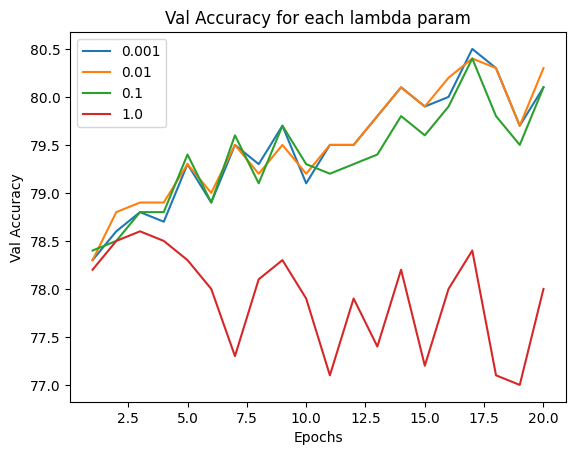

In [ ]:
#4. lambda param
fig, ax = plt.subplots()

learning_rate = 1e-3 #0.003
epochs = 20
batch_size = 64
lambda_param = 0.001
for i in range(4):
  print(f"lambda_param: {lambda_param}")
  torch.manual_seed(42)
  if device == "cuda":
    torch.cuda.manual_seed_all(42)
  model = SVM(lambda_param = lambda_param).to(device)
  print(model)
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  e = [i for i in range(1,epochs+1)]
  val_acc = []
  for t in range(epochs):
      print(f"Epoch {t+1}\n-------------------------------")
      train_loop(train_dataloader2, model, optimizer)
      val_loop(val_dataloader2,model,val_acc)
  print("Done!")
  ax.plot(e,val_acc,label = lambda_param)

  lambda_param *= 10

ax.set_xlabel('Epochs')
ax.set_ylabel('Val Accuracy')
ax.set_title('Val Accuracy for each lambda param')
ax.legend()
plt.show()



lambda_param: 0.01
SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 1.032695  [   64/ 9000]
loss: 0.782825  [ 3264/ 9000]
loss: 0.718456  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:741 out of 1000 validation examples

Accuracy: 74.1%, Avg loss: 0.671851 

Epoch 2
-------------------------------
loss: 0.676840  [   64/ 9000]
loss: 0.721478  [ 3264/ 9000]
loss: 0.755890  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:761 out of 1000 validation examples

Accuracy: 76.1%, Avg loss: 0.617326 

Epoch 3
-------------------------------
loss: 0.592439  [   64/ 9000]
loss: 0.589498  [ 3264/ 9000]
loss: 0.626684  [ 6464/ 9000]
size: 1000, num_batches: 16
Validation: 
correct:767 out of 1000 validation examples

Accuracy: 76.7%, Avg loss: 0.588504 

Epoch 4
-------------------------------
loss: 0.624014  [   64/ 9000]
loss: 0.523951  [ 3264/ 9000

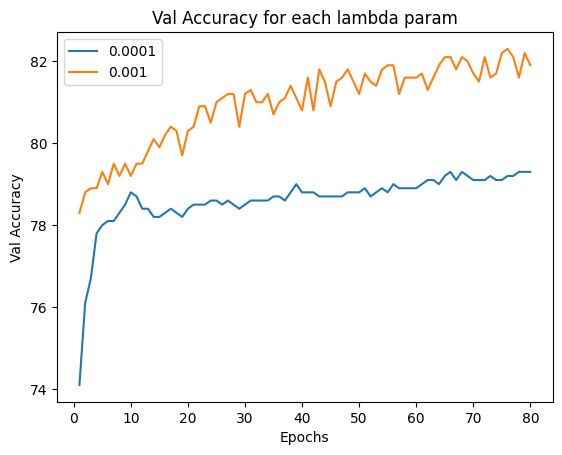

In [ ]:
#final step!
fig, ax = plt.subplots()

learning_rate = 1e-4
epochs = 80
lambda_param = 0.01
#batch size is 64 since I'm using train_dataloader2,val_dataloader2
for i in range(2):
  print(f"lambda_param: {lambda_param}")
  torch.manual_seed(42)
  if device == "cuda":
    torch.cuda.manual_seed_all(42)
  model = SVM(lambda_param = lambda_param).to(device)
  print(model)
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

  e = [i for i in range(1,epochs+1)]
  val_acc = []
  for t in range(epochs):
      print(f"Epoch {t+1}\n-------------------------------")
      train_loop(train_dataloader2, model, optimizer)
      val_loop(val_dataloader2,model,val_acc)
  print("Done!")
  ax.plot(e,val_acc,label = learning_rate)

  learning_rate *= 10

ax.set_xlabel('Epochs')
ax.set_ylabel('Val Accuracy')
ax.set_title('Val Accuracy for each lambda param')
ax.legend()
plt.show()


# j) What is the final test accuracy?

In [ ]:
learning_rate = 1e-3
epochs = 80
lambda_param = 0.01
#batch size is 64 since I'm using train_dataloader2, val_dataloader2

torch.manual_seed(42)
if device == "cuda":
  torch.cuda.manual_seed_all(42)
model = SVM(lambda_param = lambda_param).to(device)
print(model)
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum = 0.5)

e = [i for i in range(1,epochs+1)]
test_acc = []
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader2, model, optimizer)
    test_loop(test_dataloader2,model,test_acc)
print("Done!")
print(f"final test accuracy:{test_acc[epochs-1]}")

SVM(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (classifier): Linear(in_features=3072, out_features=1, bias=True)
)
Epoch 1
-------------------------------
loss: 1.032695  [   64/ 9000]
loss: 0.486601  [ 3264/ 9000]
loss: 0.529493  [ 6464/ 9000]
size: 2000, num_batches: 32
Test: 
correct:1553 out of 2000 test examples

Accuracy: 77.6%, Avg loss: 0.541207 

Epoch 2
-------------------------------
loss: 0.533836  [   64/ 9000]
loss: 0.585107  [ 3264/ 9000]
loss: 0.624005  [ 6464/ 9000]
size: 2000, num_batches: 32
Test: 
correct:1584 out of 2000 test examples

Accuracy: 79.2%, Avg loss: 0.524303 

Epoch 3
-------------------------------
loss: 0.454599  [   64/ 9000]
loss: 0.477539  [ 3264/ 9000]
loss: 0.570825  [ 6464/ 9000]
size: 2000, num_batches: 32
Test: 
correct:1592 out of 2000 test examples

Accuracy: 79.6%, Avg loss: 0.516360 

Epoch 4
-------------------------------
loss: 0.518990  [   64/ 9000]
loss: 0.434619  [ 3264/ 9000]
loss: 0.414177  [ 6464/ 9000]
size: 2000, num_batc

# **Bonus**
# a.Perform multiclass classification using soft-margin SVM on the whole dataset.

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])
trainset = datasets.CIFAR10 ( root ='./ data ',
                               train =True ,
                               download =True ,
                               transform = transform)
testset = datasets.CIFAR10 ( root ='./ data ',
                               train =False ,
                               download =True ,
                               transform = transform)
val_ratio = 0.1
num_train = len(trainset)
num_val = int(num_train*val_ratio)
num_train -= num_val

torch.manual_seed(42)
train_set,val_set = random_split(trainset, [num_train, num_val])
train_indicies = train_set.indices
print(f"length of trainset: {len(train_set)}, length of valset: {len(val_set)}, length of testset:{len(testset)}")

train_dataloader = DataLoader(train_set, batch_size=64, shuffle=True)
val_dataloader = DataLoader(val_set, batch_size=64, shuffle=False)
test_dataloader = DataLoader(testset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified
length of trainset: 45000, length of valset: 5000, length of testset:10000


In [ ]:
from torch.utils.data import Subset
class MultiClassCIFAR10(datasets.CIFAR10):
    def __init__(self, root, n, train=True, transform=None, target_transform=None, download=False):
        super(MultiClassCIFAR10, self).__init__(root, train=train, transform=transform, target_transform=target_transform, download=download)
        self.n = n
        self.targets = [1 if label == n else -1 for label in self.targets]


train_indices = train_set.indices
val_indices = val_set.indices

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])


trainingset = []
valset = []

for i in range(10):
    # Create a binary classification dataset for class i
    multi_train = MultiClassCIFAR10(root='./data', n=i, train=True, download=True, transform=transform)

    mt = Subset(multi_train, train_indices)
    vt = Subset(multi_train,val_indices)
    trainingset.append(mt)
    valset.append(vt)



Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [ ]:
def multitrain_loop(dataloader, model, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X = X.to(device)
        y = y.to(device)

        # Compute prediction and loss
        pred = model(X) #PyTorch: model(X) calls forward method of the model.
        loss = model.loss_fn(pred, y.float())

        # Backpropagation
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

def multival_loop(dataloader, model):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    print(f"size: {size}, num_batches: {num_batches}")
    val_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            val_loss += model.loss_fn(pred, y.float()).item()
            correct += ((pred > 0) == (y == 1)).sum().item()


    val_loss /= num_batches
    print(f"Validation: \ncorrect:{correct} out of {size} validation examples\n")
    correct = float(correct) / size
    accuracy = 100*correct
    print(f"Accuracy: {(accuracy):>0.1f}%, Avg loss: {val_loss:>8f} \n")

In [ ]:
num_classes = 10
learning_rate = 1e-3
epochs = 5
lambda_param = 0.01

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")
#e = [i for i in range(epochs+1)]
models = [SVM(lambda_param=lambda_param).to(device) for i in range(num_classes)]

for i in range(len(models)) : #0~9
  print(f"classifier for class {i} vs others")
  model = models[i]
  optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
  train_dataloader = DataLoader(trainingset[i], batch_size=64, shuffle=True)
  val_dataloader = DataLoader(valset[i],batch_size = 64,shuffle = True)
  for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    multitrain_loop(train_dataloader, model, optimizer)
    multival_loop(val_dataloader,model) #This is not the actual validation process, but just to check the training process
  print("Done!")

Using cuda device
classifier for class 0 vs others
Epoch 1
-------------------------------
loss: 0.983353  [   64/45000]
loss: 0.579904  [ 6464/45000]
loss: 0.463985  [12864/45000]
loss: 0.467246  [19264/45000]
loss: 0.459182  [25664/45000]
loss: 0.452291  [32064/45000]
loss: 0.357247  [38464/45000]
loss: 0.429119  [44864/45000]
size: 5000, num_batches: 79
Validation: 
correct:4253 out of 5000 validation examples

Accuracy: 85.1%, Avg loss: 0.396730 

Epoch 2
-------------------------------
loss: 0.222567  [   64/45000]
loss: 0.229261  [ 6464/45000]
loss: 0.345756  [12864/45000]
loss: 0.442029  [19264/45000]
loss: 0.425968  [25664/45000]
loss: 0.320412  [32064/45000]
loss: 0.215824  [38464/45000]
loss: 0.337324  [44864/45000]
size: 5000, num_batches: 79
Validation: 
correct:4422 out of 5000 validation examples

Accuracy: 88.4%, Avg loss: 0.333680 

Epoch 3
-------------------------------
loss: 0.317679  [   64/45000]
loss: 0.280270  [ 6464/45000]
loss: 0.456956  [12864/45000]
loss: 0.3

In [ ]:
import torch
from torch.utils.data import DataLoader

class MultiSVM():
    def __init__(self, trainingset, valset, num_classes, learning_rate, epochs, lambda_param, batch_size):
        self.num_classes = num_classes
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.lambda_param = lambda_param
        self.batch_size = batch_size
        self.trainingset = trainingset
        self.valset = valset
        device = "cuda" if torch.cuda.is_available() else "cpu"
        print(f"Using {device} device")
        models = [SVM(lambda_param=lambda_param).to(device) for _ in range(num_classes)]
        self.models = models

    def multitrain(self):
        for i in range(len(self.models)):
            print(f"Classifier for class {i} vs others")
            acc = []
            model = self.models[i]
            optimizer = torch.optim.SGD(model.parameters(), lr=self.learning_rate)
            train_dataloader = DataLoader(self.trainingset[i], batch_size=self.batch_size, shuffle=True)
            val_dataloader = DataLoader(self.valset[i], batch_size=self.batch_size, shuffle=True)
            for t in range(self.epochs):
                print(f"Epoch {t+1}\n-------------------------------")
                multitrain_loop(train_dataloader, model, optimizer)
                multival_loop(val_dataloader, model)  # This is not the actual validation process, but just to check the training process
            print("Done!")


In [ ]:
def final_val(val_dataloader,models):
  correct = 0
  size = len(val_dataloader.dataset)
  for batch_idx,(inputs,labels) in enumerate(val_dataloader):
    inputs = inputs.to(device)
    labels = labels.to(device)
    i = 0
    predictions = []
    for model in models:
        i+=1
        model.eval()
        with torch.no_grad():
          outputs = model(inputs)
          predictions.append(outputs)
    scores = torch.stack(predictions,dim=1)
    _, predicted = torch.max(scores, 1)
    correct += (predicted == labels).sum().item()

  print(f"Validation: \ncorrect:{correct} out of {size} validation examples\n")
  correct = float(correct) / size
  accuracy = 100*correct
  print(f"Accuracy: {(accuracy):>0.1f}\n")

In [ ]:
val_dataloader = DataLoader(val_set, batch_size=64, shuffle=False)

In [ ]:
# Example usage:
m = MultiSVM(trainingset, valset, num_classes=10, learning_rate=1e-3, epochs=5, lambda_param=0.01, batch_size=64)
m.multitrain()
final_val(val_dataloader,m.models)

Using cuda device
Classifier for class 0 vs others
Epoch 1
-------------------------------
loss: 0.956882  [   64/45000]
loss: 0.492843  [ 6464/45000]
loss: 0.379185  [12864/45000]
loss: 0.267043  [19264/45000]
loss: 0.375729  [25664/45000]
loss: 0.362500  [32064/45000]
loss: 0.418810  [38464/45000]
loss: 0.379337  [44864/45000]
size: 5000, num_batches: 79
Validation: 
correct:4283 out of 5000 validation examples

Accuracy: 85.7%, Avg loss: 0.391791 

Epoch 2
-------------------------------
loss: 0.592892  [   64/45000]
loss: 0.390150  [ 6464/45000]
loss: 0.447067  [12864/45000]
loss: 0.355894  [19264/45000]
loss: 0.436941  [25664/45000]
loss: 0.367624  [32064/45000]
loss: 0.435922  [38464/45000]
loss: 0.394158  [44864/45000]
size: 5000, num_batches: 79
Validation: 
correct:4431 out of 5000 validation examples

Accuracy: 88.6%, Avg loss: 0.331429 

Epoch 3
-------------------------------
loss: 0.263515  [   64/45000]
loss: 0.263908  [ 6464/45000]
loss: 0.307391  [12864/45000]
loss: 0.3

In [ ]:
m1 = MultiSVM(trainingset, valset, num_classes=10, learning_rate=1e-3, epochs=10, lambda_param=0.01, batch_size=64)
m1.multitrain()
final_val(val_dataloader,m1.models)

Using cuda device
Classifier for class 0 vs others
Epoch 1
-------------------------------
loss: 1.061993  [   64/45000]
loss: 0.464905  [ 6464/45000]
loss: 0.410205  [12864/45000]
loss: 0.520344  [19264/45000]
loss: 0.411077  [25664/45000]
loss: 0.421321  [32064/45000]
loss: 0.309957  [38464/45000]
loss: 0.465287  [44864/45000]
size: 5000, num_batches: 79
Validation: 
correct:4256 out of 5000 validation examples

Accuracy: 85.1%, Avg loss: 0.399869 

Epoch 2
-------------------------------
loss: 0.412504  [   64/45000]
loss: 0.397018  [ 6464/45000]
loss: 0.353654  [12864/45000]
loss: 0.338455  [19264/45000]
loss: 0.318097  [25664/45000]
loss: 0.233389  [32064/45000]
loss: 0.487820  [38464/45000]
loss: 0.254262  [44864/45000]
size: 5000, num_batches: 79
Validation: 
correct:4409 out of 5000 validation examples

Accuracy: 88.2%, Avg loss: 0.338408 

Epoch 3
-------------------------------
loss: 0.326111  [   64/45000]
loss: 0.491002  [ 6464/45000]
loss: 0.349317  [12864/45000]
loss: 0.3

In [ ]:

'''original
correct = 0
size = len(val_dataloader.dataset)
for batch_idx,(inputs,labels) in enumerate(val_dataloader):
  inputs = inputs.to(device)
  labels = labels.to(device)
  i = 0
  predictions = []
  for model in models:
      i+=1
      model.eval()
      with torch.no_grad():
        outputs = model(inputs)
        predictions.append(outputs)
  scores = torch.stack(predictions,dim=1)
  _, predicted = torch.max(scores, 1)
  #print(scores.shape)
  #print(predicted)
  correct += (predicted == labels).sum().item()

print(f"Validation: \ncorrect:{correct} out of {size} validation examples\n")
correct = float(correct) / size
accuracy = 100*correct
print(f"Accuracy: {(accuracy):>0.1f}\n")
'''

torch.Size([64, 10])
tensor([7, 8, 2, 1, 7, 8, 1, 1, 0, 8, 0, 3, 6, 7, 9, 8, 5, 0, 1, 9, 8, 6, 6, 8,
        6, 6, 3, 9, 0, 9, 8, 2, 5, 0, 0, 3, 7, 7, 5, 6, 8, 8, 8, 5, 8, 3, 8, 6,
        9, 7, 7, 2, 7, 9, 7, 6, 8, 6, 0, 1, 4, 7, 7, 1], device='cuda:0')
torch.Size([64, 10])
tensor([0, 6, 7, 6, 9, 3, 1, 9, 9, 0, 1, 8, 4, 9, 8, 0, 7, 4, 0, 0, 7, 0, 7, 8,
        8, 1, 0, 0, 0, 4, 5, 1, 1, 5, 0, 3, 7, 0, 0, 0, 8, 3, 6, 8, 7, 6, 1, 1,
        7, 1, 8, 8, 2, 6, 1, 9, 9, 1, 7, 2, 3, 6, 0, 8], device='cuda:0')
torch.Size([64, 10])
tensor([0, 0, 0, 0, 6, 7, 6, 6, 3, 1, 0, 7, 0, 5, 1, 8, 8, 8, 5, 9, 8, 9, 8, 3,
        8, 9, 3, 9, 6, 7, 8, 9, 0, 8, 9, 5, 9, 0, 3, 8, 3, 1, 1, 9, 7, 8, 1, 1,
        7, 0, 5, 8, 0, 1, 0, 1, 0, 8, 8, 8, 7, 9, 0, 8], device='cuda:0')
torch.Size([64, 10])
tensor([6, 0, 8, 0, 7, 8, 7, 0, 7, 8, 1, 9, 9, 0, 0, 0, 7, 8, 8, 1, 2, 7, 6, 8,
        1, 1, 2, 6, 0, 8, 8, 5, 3, 0, 8, 8, 6, 0, 1, 8, 0, 0, 3, 6, 7, 0, 5, 5,
        5, 0, 6, 3, 7, 6, 2, 9, 8, 7, 9, 0, 7, 8, 8, 0

In [ ]:
'''models_predictions = model_pred(models, val_dataloader)
scores = torch.stack(models_predictions, dim=1) #scores for each model(from model0 to model9)
_, predicted = torch.max(scores, 1)
multi_validation(val_dataloader,predicted)
'''